# Tesla stock price over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stock = pd.read_csv('TESLAHistoricalQuotes.csv')
stock = stock.drop(0,0)

In [3]:
# Fix up the date column
stock.date = pd.to_datetime(stock.date)
stock = stock.sort_values('date')

In [4]:
stock.date = stock.date + timedelta(hours=16)

In [5]:
new_df = stock[['date', 'close']].copy()

In [6]:
new_df.columns = ['date', 'price']

In [7]:
stock.date = stock.date - timedelta(hours=6.5)

In [8]:
stock.head()

,date,close,volume,open,high,low
1866,2010-06-29 09:30:00,23.89,18751150.0000,19.00,25.0000,17.54
1865,2010-06-30 09:30:00,23.83,17165210.0000,25.79,30.4192,23.30
1864,2010-07-01 09:30:00,21.96,8216789.0000,25.00,25.9200,20.27
1863,2010-07-02 09:30:00,19.20,5135795.0000,23.00,23.1000,18.71
1862,2010-07-06 09:30:00,16.11,6858092.0000,20.00,20.0000,15.83


In [9]:
stock.columns = ['date', 'close', 'volume', 'price', 'high', 'low']

In [10]:
new_df = pd.concat([new_df, stock[['date', 'price']]], axis=0)

In [11]:
new_df = new_df.sort_values('date')
new_df.set_index(new_df.date, inplace=True)
new_df = new_df.drop('date', 1)

In [12]:
new_df.head()

,price
date,
2010-06-29 09:30:00,19.00
2010-06-29 16:00:00,23.89
2010-06-30 09:30:00,25.79
2010-06-30 16:00:00,23.83
2010-07-01 09:30:00,25.00


# EDA

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # This can be fine tuned.  There is some relationship, but hard to quantify.
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

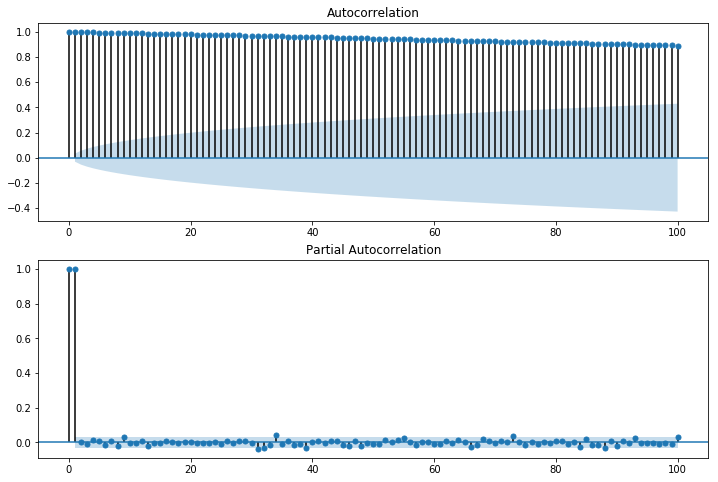

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df.price, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df.price, lags=100, ax=ax2)
plt.show()

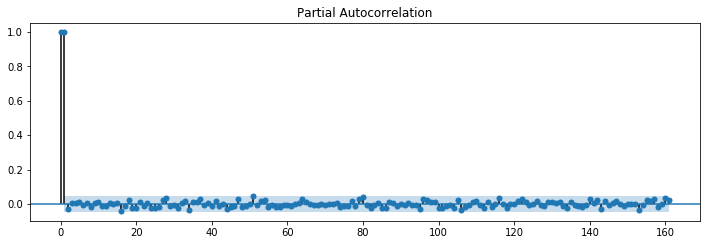

In [64]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.close, lags=161, ax=ax2)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


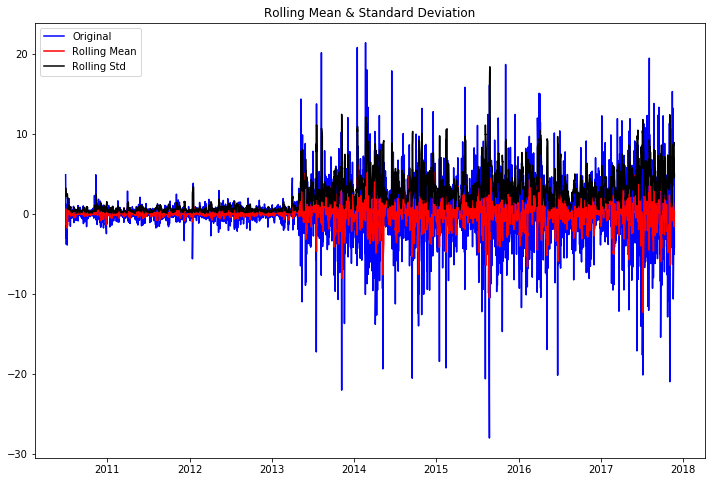

Results of Dickey-Fuller Test:
Test Statistic                  -61.752470
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    3730.000000
Critical Value (1%)              -3.432104
Critical Value (5%)              -2.862315
Critical Value (10%)             -2.567183
dtype: float64


In [62]:
new_df['first_difference'] = new_df.price - new_df.price.shift(1)  
test_stationarity(new_df.first_difference.dropna(inplace=False))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


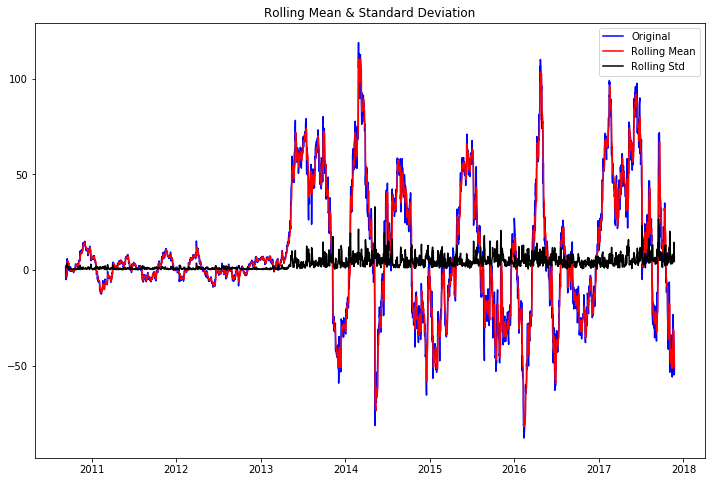

Results of Dickey-Fuller Test:
Test Statistic                   -4.495335
p-value                           0.000200
#Lags Used                        0.000000
Number of Observations Used    3631.000000
Critical Value (1%)              -3.432152
Critical Value (5%)              -2.862336
Critical Value (10%)             -2.567194
dtype: float64


In [75]:
new_df['season_80'] = new_df.price - new_df.price.shift(100)  
test_stationarity(new_df.season_80.dropna(inplace=False))

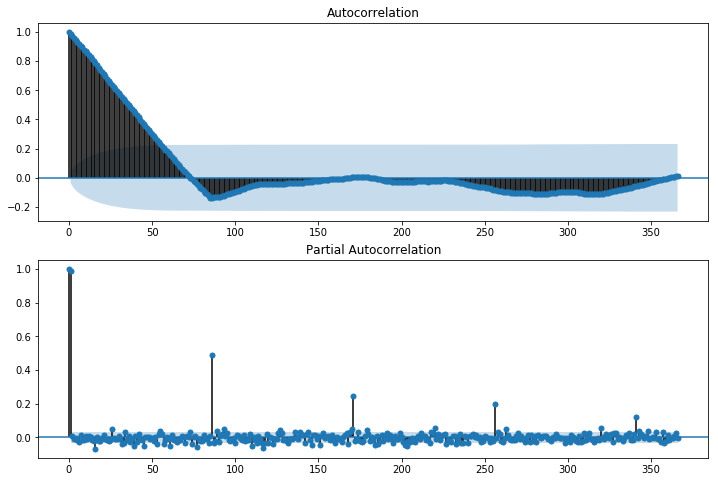

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df.season_80.iloc[85:], lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df.season_80.iloc[85:], lags=366, ax=ax2)
plt.show()

I don't think there is seasonality in this!

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


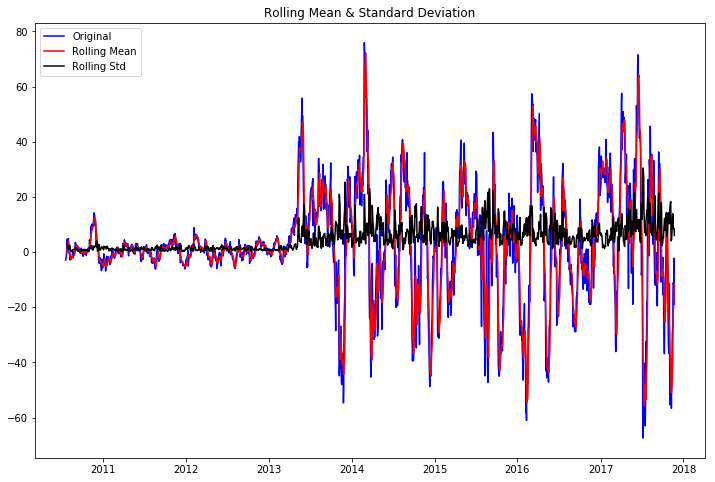

Results of Dickey-Fuller Test:
Test Statistic                -7.457554e+00
p-value                        5.461482e-11
#Lags Used                     2.400000e+01
Number of Observations Used    1.825000e+03
Critical Value (1%)           -3.433938e+00
Critical Value (5%)           -2.863125e+00
Critical Value (10%)          -2.567614e+00
dtype: float64


In [124]:
stock['season_16'] = stock.close - stock.close.shift(16)  
test_stationarity(stock.season_16.dropna(inplace=False))

In [90]:
mod = sm.tsa.statespace.SARIMAX(new_df.price, trend='n', order=(1,1,0))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                 3732
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -9988.001
Date:                Wed, 20 Dec 2017   AIC                          19980.002
Time:                        14:59:47   BIC                          19992.452
Sample:                    06-29-2010   HQIC                         19984.431
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0108      0.011     -1.024      0.306      -0.031       0.010
sigma2        12.3815      0.128     96.873      0.000      12.131      12.632
===================================================================================
Ljung-Box (Q):                       44.77   Jarque-Bera (JB):             10230.27
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):              42.66   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
mod = sm.tsa.statespace.SARIMAX(new_df.price, trend='n', order=(14,1,0), seasonal_order=(0,0,0,0))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                 3732
Model:              SARIMAX(14, 1, 0)   Log Likelihood               -9984.312
Date:                Wed, 20 Dec 2017   AIC                          19998.625
Time:                        15:00:04   BIC                          20091.995
Sample:                    06-29-2010   HQIC                         20031.839
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0103      0.011     -0.959      0.337      -0.031       0.011
ar.L2          0.0138      0.011      1.314      0.189      -0.007       0.034
ar.L3         -0.0116      0.012     -0.970      0.332      -0.035       0.012
ar.L4         -0.0009      0.012     -0.078      0.938      -0.024       0.022
ar.L5       9.271e-05      0.014      0.007      0.995      -0.027       0.027
ar.L6         -0.0192      0.012     -1.608      0.108      -0.043       0.004
ar.L7         -0.0049      0.012     -0.415      0.678      -0.028       0.018
ar.L8         -0.0128      0.011     -1.141      0.254      -0.035       0.009
ar.L9         -0.0096      0.014     -0.688      0.491      -0.037       0.018
ar.L10         0.0093      0.012      0.796      0.426      -0.014       0.032
ar.L11         0.0022      0.014      0.153      0.878      -0.025       0.030
ar.L12         0.0256      0.012      2.084      0.037       0.002       0.050
ar.L13        -0.0148      0.015     -1.013      0.311      -0.043       0.014
ar.L14         0.0002      0.012      0.019      0.984      -0.023       0.023
sigma2        12.3569      0.130     94.899      0.000      12.102      12.612
===================================================================================
Ljung-Box (Q):                       36.85   Jarque-Bera (JB):             10237.81
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              42.67   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
mod = sm.tsa.statespace.SARIMAX(new_df.price, trend='n', order=(3,1,30), seasonal_order=(0,0,0,0))
results = mod.fit()
results.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                 3732
Model:              SARIMAX(3, 1, 30)   Log Likelihood               -9972.530
Date:                Wed, 20 Dec 2017   AIC                          20013.060
Time:                        15:01:32   BIC                          20224.700
Sample:                    06-29-2010   HQIC                         20088.346
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.180      0.598      0.550      -0.245       0.460
ar.L2         -0.0810      0.164     -0.495      0.621      -0.402       0.240
ar.L3         -0.7125      0.167     -4.277      0.000      -1.039      -0.386
ma.L1         -0.1143      0.180     -0.634      0.526      -0.468       0.239
ma.L2          0.1013      0.165      0.612      0.541      -0.223       0.426
ma.L3          0.6977      0.171      4.088      0.000       0.363       1.032
ma.L4          0.0014      0.015      0.093      0.926      -0.028       0.031
ma.L5          0.0133      0.016      0.810      0.418      -0.019       0.046
ma.L6         -0.0330      0.015     -2.162      0.031      -0.063      -0.003
ma.L7          0.0040      0.015      0.260      0.795      -0.026       0.034
ma.L8         -0.0184      0.016     -1.188      0.235      -0.049       0.012
ma.L9         -0.0231      0.018     -1.312      0.189      -0.058       0.011
ma.L10         0.0126      0.014      0.888      0.375      -0.015       0.041
ma.L11        -0.0077      0.017     -0.464      0.642      -0.040       0.025
ma.L12         0.0190      0.016      1.188      0.235      -0.012       0.050
ma.L13        -0.0017      0.019     -0.089      0.929      -0.038       0.035
ma.L14         0.0046      0.017      0.268      0.789      -0.029       0.038
ma.L15         0.0456      0.016      2.799      0.005       0.014       0.078
ma.L16        -0.0206      0.017     -1.225      0.220      -0.053       0.012
ma.L17         0.0032      0.018      0.178      0.858      -0.032       0.038
ma.L18         0.0143      0.017      0.826      0.409      -0.020       0.048
ma.L19        -0.0027      0.019     -0.146      0.884      -0.039       0.034
ma.L20     -8.989e-05      0.017     -0.005      0.996      -0.033       0.033
ma.L21         0.0033      0.016      0.206      0.837      -0.028       0.035
ma.L22         0.0097      0.017      0.579      0.563      -0.023       0.042
ma.L23         0.0106      0.017      0.639      0.523      -0.022       0.043
ma.L24         0.0181      0.016      1.149      0.251      -0.013       0.049
ma.L25        -0.0312      0.017     -1.808      0.071      -0.065       0.003
ma.L26         0.0203      0.017      1.161      0.246      -0.014       0.055
ma.L27         0.0049      0.020      0.245      0.807      -0.035       0.044
ma.L28        -0.0426      0.018     -2.314      0.021      -0.079      -0.007
ma.L29        -0.0207      0.016     -1.315      0.189      -0.051       0.010
ma.L30         0.0225      0.017      1.334      0.182      -0.011       0.055
sigma2        12.2909      0.137     89.389      0.000      12.021      12.560
===================================================================================
Ljung-Box (Q):                       16.41   Jarque-Bera (JB):              9740.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              42.22   Skew:                

In [109]:
mod = sm.tsa.statespace.SARIMAX(new_df.price, trend='n', order=(2,1,3))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                 3732
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -9987.180
Date:                Wed, 20 Dec 2017   AIC                          19986.360
Time:                        15:06:34   BIC                          20023.708
Sample:                    06-29-2010   HQIC                         19999.646
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4195      0.530      0.791      0.429      -0.619       1.458
ar.L2          0.1986      0.544      0.365      0.715      -0.867       1.265
ma.L1         -0.4301      0.530     -0.811      0.417      -1.469       0.609
ma.L2         -0.1805      0.547     -0.330      0.742      -1.254       0.892
ma.L3         -0.0184      0.014     -1.339      0.181      -0.045       0.009
sigma2        12.3758      0.129     96.281      0.000      12.124      12.628
===================================================================================
Ljung-Box (Q):                       42.61   Jarque-Bera (JB):             10176.92
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):              42.81   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
# cut out 2017 data
1866-226

1640

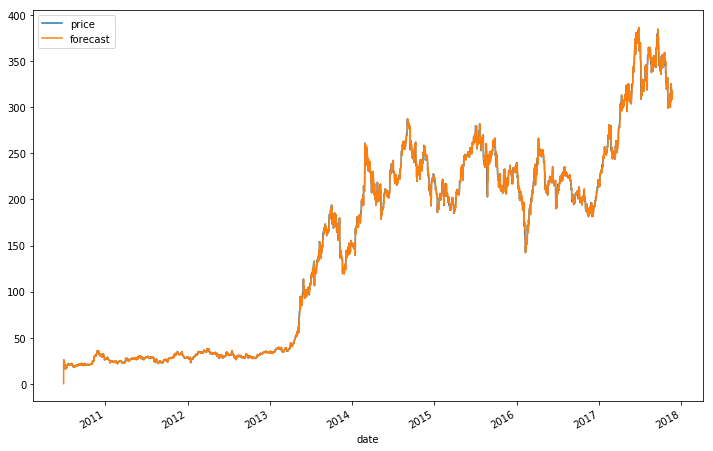

In [110]:
new_df['forecast'] = results.predict(dynamic=False)
new_df[['price', 'forecast']].plot(figsize=(12, 8)) 
plt.show()

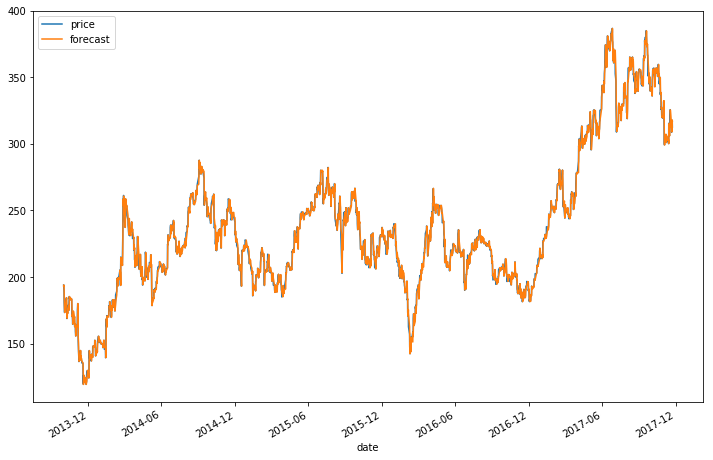

In [111]:
new_df[['price', 'forecast']].iloc[1640:].plot(figsize=(12, 8)) 
plt.show()

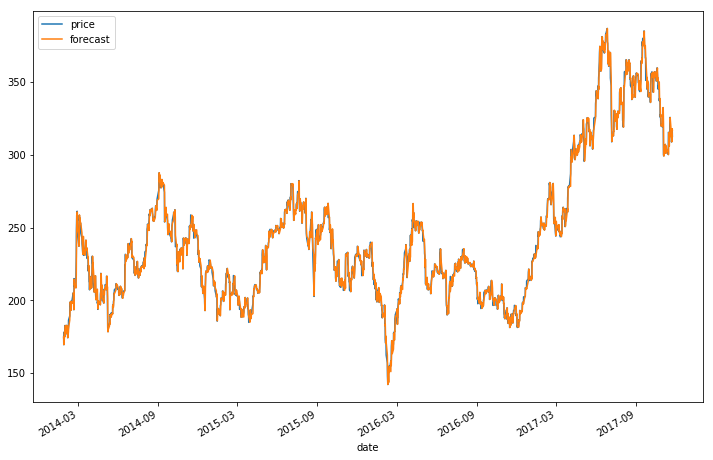

In [112]:
new_df[['price', 'forecast']].iloc[1800:].plot(figsize=(12, 8)) 
plt.show()

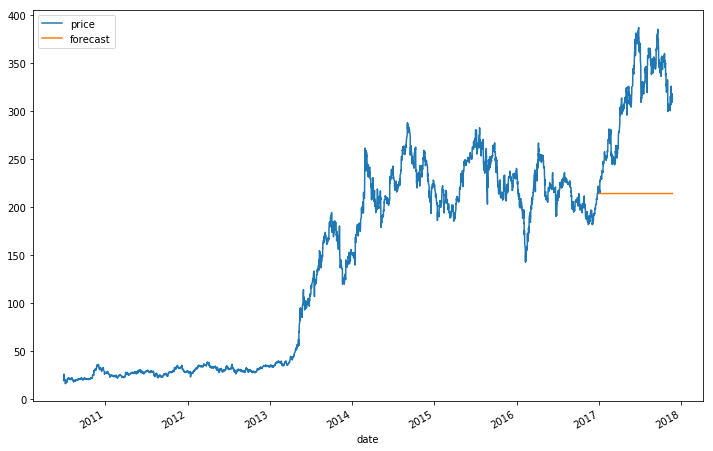

In [125]:
new_df['forecast'] = [np.NaN for i in range(3280)] + list(results.predict(start=3280, end=3731, dynamic=True))
new_df[['price', 'forecast']].plot(figsize=(12, 8)) 
plt.show()

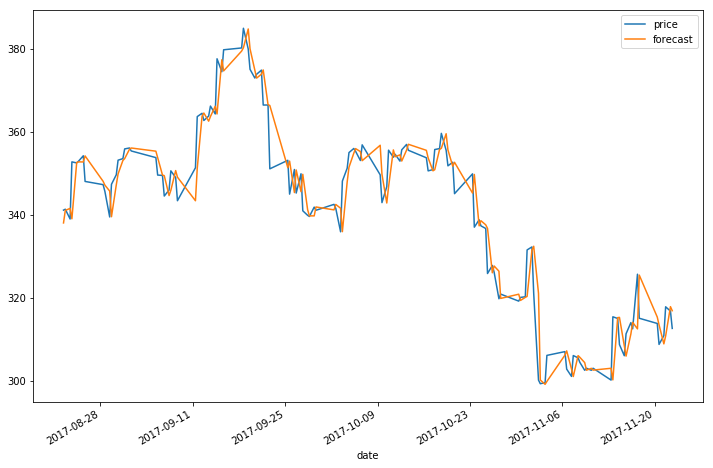

In [128]:
new_df['forecast'] = [np.NaN for i in range(3280)] + list(results.predict(start=3280, end=3731, dynamic=False))
new_df[['price', 'forecast']].iloc[3600:].plot(figsize=(12, 8)) 
plt.show()

In [ ]:
#Basically I'm a day behind; always.

In [35]:
def profit_calculator(dataframe, predict_col, early_stop=None):  
    money_counter = 0
    transactions = 0
    own = False
    last_buy = 0
    current_price = 0
    for num, i in enumerate(dataframe.iloc[:early_stop].iterrows()):
        if i[1][predict_col] == 1 and own == False:
            money_counter -= i[1]['price']
            own = True
            transactions += 1
            last_buy = i[1]['price']
        elif i[1][predict_col] == 0 and own == True:
            money_counter += i[1]['price']
            own = False
            transactions += 1
        else:
            pass
        current_price=i[1]['price']
    print('Own?', own)
    print('Last Buying price: $', last_buy)
    print('Current price: $', current_price)
    print('Cash? $', money_counter)
    if own == True:
        print('Profit: $', current_price + money_counter)
    else:
        print('Profit: $', money_counter)
    print('Number of Transactins:', transactions)
    print('Cost of transactions: $', transactions*5)

In [132]:
new_df['target'] = new_df.price.shift(-1)

In [149]:
new_df.tail()

,price,first_difference,season_80,forecast,target,predict_grow,true_grow
date,,,,,,,
2017-11-20 16:00:00,308.74,-5.05,-54.95,313.454153,310.86,1,1
2017-11-21 09:30:00,310.86,2.12,-53.63,308.870018,317.81,0,1
2017-11-21 16:00:00,317.81,6.95,-44.94,310.770208,316.77,0,0
2017-11-22 09:30:00,316.77,-1.04,-47.05,317.846330,312.60,1,0
2017-11-22 16:00:00,312.60,-4.17,-53.63,316.869165,NaN,1,0


In [148]:
new_df['forecast'] = results.predict(dynamic=False)

In [150]:
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)
new_df['true_grow'] = new_df[['target', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)

In [155]:
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)

Own? True
Last Buying price: $ 316.77
Current price: $ 316.77
Cash? $ -264.04
Profit: $ 52.73
Number of Transactins: 231
Cost of transactions: $ 1155


In [154]:
profit_calculator(new_df.iloc[3280:], 'true_grow', -1)

Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 858.16
Profit: $ 858.16
Number of Transactins: 236
Cost of transactions: $ 1180


Damn.

In [16]:
new_df.head()

,price
date,
2010-06-29 09:30:00,19.00
2010-06-29 16:00:00,23.89
2010-06-30 09:30:00,25.79
2010-06-30 16:00:00,23.83
2010-07-01 09:30:00,25.00


In [14]:
from statsmodels.tsa.arima_model import ARMA

In [28]:
from sklearn import metrics

In [58]:
model = ARMA(new_df.price, (5, 21)).fit()
model.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid va

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  price   No. Observations:                 3732
Model:                    ARMA(5, 21)   Log Likelihood               -9985.016
Method:                       css-mle   S.D. of innovations              3.509
Date:                Wed, 20 Dec 2017   AIC                          20026.032
Time:                        16:52:06   BIC                          20200.324
Sample:                    06-29-2010   HQIC                         20088.032
                         - 11-22-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          335.7079        nan        nan        nan         nan         nan
ar.L1.price      0.7689      0.004    185.376      0.000       0.761       0.777
ar.L2.price      0.6074      0.005    115.249      0.000       0.597       0.618
ar.L3.price      0.0842      0.003     33.293      0.000       0.079       0.089
ar.L4.price     -0.9482      0.001   -777.670      0.000      -0.951      -0.946
ar.L5.price      0.4876      0.002    201.837      0.000       0.483       0.492
ma.L1.price      0.2218      0.017     13.125      0.000       0.189       0.255
ma.L2.price     -0.3640      0.017    -21.294      0.000      -0.397      -0.330
ma.L3.price     -0.4676      0.018    -26.454      0.000      -0.502      -0.433
ma.L4.price      0.4857      0.020     24.863      0.000       0.447       0.524
ma.L5.price     -0.0073      0.021     -0.351      0.726      -0.048       0.034
ma.L6.price     -0.0062      0.021     -0.297      0.766      -0.047       0.035
ma.L7.price     -0.0149      0.021     -0.712      0.477      -0.056       0.026
ma.L8.price     -0.0054      0.021     -0.257      0.797      -0.047       0.036
ma.L9.price     -0.0031      0.021     -0.149      0.882      -0.044       0.038
ma.L10.price     0.0064      0.021      0.304      0.761      -0.035       0.048
ma.L11.price     0.0115      0.021      0.553      0.581      -0.029       0.052
ma.L12.price     0.0194      0.021      0.925      0.355      -0.022       0.061
ma.L13.price    -0.0179      0.021     -0.843      0.399      -0.059       0.024
ma.L14.price    -0.0054      0.021     -0.260      0.795      -0.046       0.035
ma.L15.price     0.0261      0.021      1.215      0.224      -0.016       0.068
ma.L16.price     0.0135      0.021      0.651      0.515      -0.027       0.054
ma.L17.price    -0.0213      0.022     -0.964      0.335      -0.065       0.022
ma.L18.price    -0.0133      0.018     -0.728      0.467      -0.049       0.023
ma.L19.price     0.0250      0.019      1.326      0.185      -0.012       0.062
ma.L20.price    -0.0086      0.017     -0.502      0.615      -0.042       0.025
ma.L21.price     0.0151      0.016      0.933      0.351      -0.017       0.047
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.7653           -0.6699j            1.0171           -0.3856
AR.2            -0.7653           +0.6699j            1.0171            0.3856
AR.3             1.0001           -0.0000j            1.0001           -0.0000
AR.4             1.2376           -0.6712j            1.4080           -0.0791
AR.5             1.2376           +0.6712j            1.4080            0.0791
MA.1            -0.7725           -0.6655j            1.0196           -0.3868
MA.2            -0.77

In [59]:
new_df['forecast'] = model.predict()
new_df['target'] = new_df.price.shift(-1)

In [60]:
new_df.head()

,price,forecast,target,predict_grow,true_grow
date,,,,,
2010-06-29 09:30:00,19.00,335.707875,23.89,1,1
2010-06-29 16:00:00,23.89,19.038717,25.79,0,1
2010-06-30 09:30:00,25.79,23.872388,23.83,0,0
2010-06-30 16:00:00,23.83,25.880261,25.00,1,1
2010-07-01 09:30:00,25.00,23.859566,21.96,0,0


In [1]:
plt.scatter(new_df.iloc[1:-1].target, new_df.iloc[1:-1].forecast)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", metrics.r2_score(new_df.iloc[1:-1].target, new_df.iloc[1:-1].forecast))
print("MSE:", metrics.mean_squared_error(new_df.iloc[1:-1].target, new_df.iloc[1:-1].forecast))
plt.savefig('pred_true.png', bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

In [68]:
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)
new_df['true_grow'] = new_df[['target', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)

In [69]:
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)

Own? True
Last Buying price: $ 316.77
Current price: $ 316.77
Cash? $ -262.83
Profit: $ 53.94
Number of Transactins: 235
Cost of transactions: $ 1175


In [70]:
profit_calculator(new_df.iloc[3280:], 'true_grow', -1)

Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 858.16
Profit: $ 858.16
Number of Transactins: 236
Cost of transactions: $ 1180


In [73]:
# Move the target a bit and see
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)
new_df['true_grow'] = new_df[['target', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)

In [74]:
print("Model Resuls:")
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)
print("\nBest Case Results:")
profit_calculator(new_df.iloc[3280:], 'true_grow', -1)

Model Resuls:
Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ -58.45
Profit: $ -58.45
Number of Transactins: 50
Cost of transactions: $ 250

Best Case Results:
Own? True
Last Buying price: $ 310.86
Current price: $ 316.77
Cash? $ 242.42
Profit: $ 559.19
Number of Transactins: 51
Cost of transactions: $ 255


OH WELL.

# MORE EXPERIMENTING

In [64]:
rolmean = pd.rolling_mean(new_df.price, window=21)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).mean()
  """Entry point for launching an IPython kernel.


In [65]:
new_df['rolmean'] = rolmean

In [66]:
new_df.head()

,price,rolmean,first_difference,forecast,target,predict_grow,true_grow
date,,,,,,,
2010-06-29 09:30:00,19.00,NaN,NaN,0.0,NaN,0,2
2010-06-29 16:00:00,23.89,NaN,NaN,0.0,NaN,0,2
2010-06-30 09:30:00,25.79,NaN,NaN,0.0,NaN,0,2
2010-06-30 16:00:00,23.83,NaN,NaN,0.0,23.502,0,2
2010-07-01 09:30:00,25.00,NaN,NaN,0.0,24.094,0,2


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


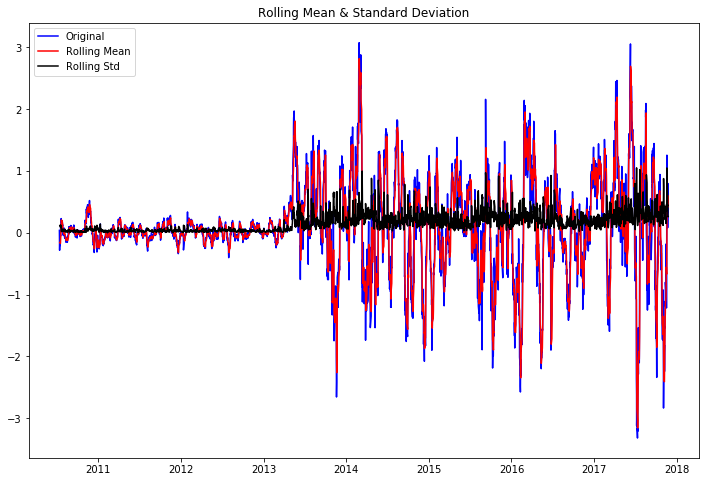

Results of Dickey-Fuller Test:
Test Statistic                -8.231582e+00
p-value                        6.042789e-13
#Lags Used                     2.400000e+01
Number of Observations Used    3.686000e+03
Critical Value (1%)           -3.432125e+00
Critical Value (5%)           -2.862324e+00
Critical Value (10%)          -2.567188e+00
dtype: float64


In [67]:
new_df['first_difference'] = new_df.rolmean - new_df.rolmean.shift(1)  
test_stationarity(new_df.first_difference.dropna(inplace=False))

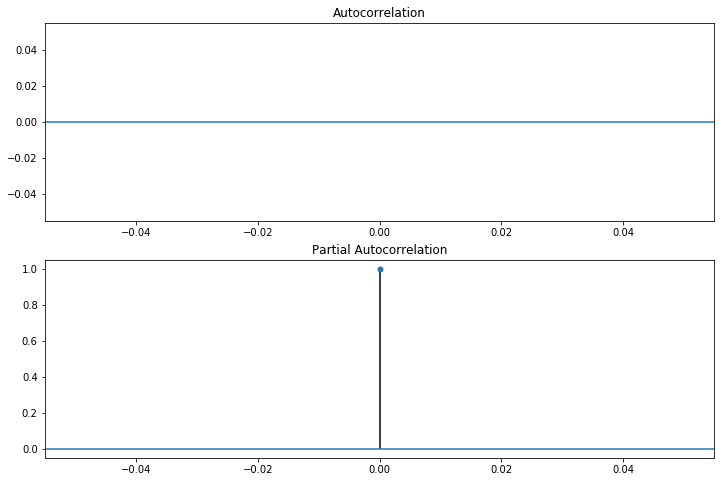

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df.rolmean.iloc[14:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df.rolmean.iloc[14:], lags=20, ax=ax2)
plt.show()

In [69]:
mod = sm.tsa.statespace.SARIMAX(new_df.rolmean, trend='n', order=(1,1,0))
results = mod.fit()
results.summary()

/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                rolmean   No. Observations:                 3732
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 139.963
Date:                Wed, 20 Dec 2017   AIC                           -275.926
Time:                        20:47:24   BIC                           -263.477
Sample:                    06-29-2010   HQIC                          -271.497
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9513      0.004    251.938      0.000       0.944       0.959
sigma2         0.0540      0.001     83.417      0.000       0.053       0.055
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):              4731.57
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):              47.23   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
new_df['forecast'] = results.predict()
new_df['target'] = new_df.rolmean.shift(-1)

Score: 0.999936351892
MSE: 0.72662850242


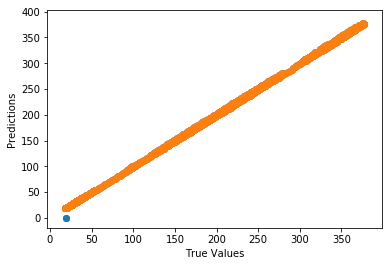

In [72]:
plt.scatter(new_df.iloc[21:-1].target, new_df.iloc[21:-1].forecast)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", metrics.r2_score(new_df.iloc[21:-1].target, new_df.iloc[21:-1].forecast))
print("MSE:", metrics.mean_squared_error(new_df.iloc[21:-1].target, new_df.iloc[21:-1].forecast))
plt.show()

In [73]:
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)
new_df['true_grow'] = new_df[['target', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)

In [74]:
print("Model Resuls:")
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)
print("\nBest Case Results:")
profit_calculator(new_df.iloc[3280:], 'true_grow', -1)

Model Resuls:
Own? False
Last Buying price: $ 306.01
Current price: $ 316.77
Cash? $ -4.19
Profit: $ -4.19
Number of Transactins: 44
Cost of transactions: $ 220

Best Case Results:
Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 8.31
Profit: $ 8.31
Number of Transactins: 44
Cost of transactions: $ 220


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)

    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')

    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])

    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')

    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

In [76]:
eval_sklearn_model(new_df.true_grow, new_df.predict_grow)

True Negative:  2092 | False Positive:  25
False Negative:  33 | True Positive:  1582 

Sensitivity (TP/ TP + FN):  0.979566563467
Specificity (TN/ TN + FP):  0.988190836089 

Accuracy:  0.984458735263
Precision:  0.984443061605




In [77]:
# Move the target a bit and see
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)
new_df['true_grow'] = new_df[['target', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)

In [78]:
print("Model Resuls:")
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)
print("\nBest Case Results:")
profit_calculator(new_df.iloc[3280:], 'true_grow', -1)

Model Resuls:
Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 21.56
Profit: $ 21.56
Number of Transactins: 18
Cost of transactions: $ 90

Best Case Results:
Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 21.57
Profit: $ 21.57
Number of Transactins: 18
Cost of transactions: $ 90


This is weird!  Increasing the rolling mean, I can get SUPER accurate predictions from the model.  But at the same time the change in price is reduced so the potential for profit is decreased!

In [82]:
def profit_calculator(dataframe, predict_col, early_stop=None):  
    money_counter = 0
    transactions = 0
    own = False
    last_buy = 0
    current_price = 0
    for num, i in enumerate(dataframe.iloc[:early_stop].iterrows()):
        if i[1][predict_col] == 1 and own == False:
            money_counter -= i[1]['price']
            own = True
            transactions += 1
            last_buy = i[1]['price']
        elif i[1][predict_col] == 0 and own == True:
            money_counter += i[1]['price']
            own = False
            transactions += 1
        else:
            pass
        current_price=i[1]['price']
    print('Own?', own)
    print('Last Buying price: $', last_buy)
    print('Current price: $', current_price)
    print('Cash? $', money_counter)
    if own == True:
        print('Profit: $', current_price + money_counter)
        profits.append(current_price + money_counter)
    else:
        print('Profit: $', money_counter)
        profits.append(money_counter)
    print('Number of Transactins:', transactions)
    print('Cost of transactions: $', transactions*5)

In [83]:
profits = []
for i in range(1, 30):
    rolmean = pd.rolling_mean(new_df.price, window=i)
    new_df['rolmean'] = rolmean
    mod = sm.tsa.statespace.SARIMAX(new_df.rolmean, trend='n', order=(1,1,0))
    results = mod.fit()
    results.summary()
    new_df['forecast'] = results.predict()
    new_df['target'] = new_df.rolmean.shift(-1)
    new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)
    profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ -35.59
Profit: $ -35.59
Number of Transactins: 50
Cost of transactions: $ 250


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ -33.595
Profit: $ -33.595
Number of Transactins: 62
Cost of transactions: $ 310


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ -20.3
Profit: $ -20.3
Number of Transactins: 52
Cost of transactions: $ 260


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -13.17
Profit: $ -13.17
Number of Transactins: 48
Cost of transactions: $ 240


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? True
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -310.09
Profit: $ 6.68
Number of Transactins: 43
Cost of transactions: $ 215


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? True
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -291.46
Profit: $ 25.31
Number of Transactins: 39
Cost of transactions: $ 195


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? True
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -262.85
Profit: $ 53.92
Number of Transactins: 39
Cost of transactions: $ 195


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=8,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 300.13
Current price: $ 316.77
Cash? $ 79.21
Profit: $ 79.21
Number of Transactins: 38
Cost of transactions: $ 190


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=9,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 300.13
Current price: $ 316.77
Cash? $ 86.68
Profit: $ 86.68
Number of Transactins: 34
Cost of transactions: $ 170


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 80.285
Profit: $ 80.285
Number of Transactins: 34
Cost of transactions: $ 170


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 300.13
Current price: $ 316.77
Cash? $ 62.855
Profit: $ 62.855
Number of Transactins: 30
Cost of transactions: $ 150


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 300.13
Current price: $ 316.77
Cash? $ 76.275
Profit: $ 76.275
Number of Transactins: 30
Cost of transactions: $ 150


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=13,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 321.08
Current price: $ 316.77
Cash? $ 65.965
Profit: $ 65.965
Number of Transactins: 30
Cost of transactions: $ 150


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 24.645
Profit: $ 24.645
Number of Transactins: 26
Cost of transactions: $ 130


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 20.675
Profit: $ 20.675
Number of Transactins: 24
Cost of transactions: $ 120


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 27.735
Profit: $ 27.735
Number of Transactins: 24
Cost of transactions: $ 120


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=17,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ -18.235
Profit: $ -18.235
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=18,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ -14.485
Profit: $ -14.485
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=19,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 21.2
Profit: $ 21.2
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 21.2
Profit: $ 21.2
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 21.56
Profit: $ 21.56
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 27.72
Profit: $ 27.72
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=23,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 28.6
Profit: $ 28.6
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 45.71
Profit: $ 45.71
Number of Transactins: 20
Cost of transactions: $ 100


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 45.25
Profit: $ 45.25
Number of Transactins: 20
Cost of transactions: $ 100


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=26,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 54.46
Profit: $ 54.46
Number of Transactins: 20
Cost of transactions: $ 100


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=27,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 50.59
Profit: $ 50.59
Number of Transactins: 18
Cost of transactions: $ 90


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 51.79
Profit: $ 51.79
Number of Transactins: 16
Cost of transactions: $ 80


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=29,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 345.1
Current price: $ 316.77
Cash? $ 51.79
Profit: $ 51.79
Number of Transactins: 16
Cost of transactions: $ 80


In [87]:
profits

[-35.589999999999918,
 -33.594999999999857,
 -20.300000000000011,
 -13.169999999999959,
 6.6800000000001205,
 25.310000000000002,
 53.92000000000013,
 79.210000000000036,
 86.679999999999893,
 80.284999999999854,
 62.854999999999848,
 76.274999999999864,
 65.964999999999918,
 24.644999999999868,
 20.674999999999898,
 27.7349999999999,
 -18.235000000000127,
 -14.485000000000127,
 21.199999999999932,
 21.199999999999932,
 21.559999999999945,
 27.719999999999914,
 28.599999999999909,
 45.709999999999923,
 45.249999999999886,
 54.459999999999923,
 50.589999999999975,
 51.789999999999907,
 51.789999999999907,
 86.679999999999893]

In [86]:
rolmean = pd.rolling_mean(new_df.price, window=9)
new_df['rolmean'] = rolmean
mod = sm.tsa.statespace.SARIMAX(new_df.rolmean, trend='n', order=(1,1,0))
results = mod.fit()
results.summary()
new_df['forecast'] = results.predict()
new_df['target'] = new_df.rolmean.shift(-1)
new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 5 else 0 if x[0] - x[1] <= -5 else 2, axis=1)
profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=9,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Own? False
Last Buying price: $ 300.13
Current price: $ 316.77
Cash? $ 86.68
Profit: $ 86.68
Number of Transactins: 34
Cost of transactions: $ 170


In [88]:
profits = []
for i in range(1, 30):
    rolmean = pd.rolling_mean(new_df.price, window=i)
    new_df['rolmean'] = rolmean
    mod = sm.tsa.statespace.SARIMAX(new_df.rolmean, trend='n', order=(1,1,0))
    results = mod.fit()
    results.summary()
    new_df['forecast'] = results.predict()
    new_df['target'] = new_df.rolmean.shift(-1)
    new_df['predict_grow'] = new_df[['forecast', 'price']].apply(lambda x: 1 if x[0] - x[1] >= 0 else 0, axis=1)
    profit_calculator(new_df.iloc[3280:], 'predict_grow', -1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? True
Last Buying price: $ 316.77
Current price: $ 316.77
Cash? $ -263.43
Profit: $ 53.34
Number of Transactins: 233
Cost of transactions: $ 1165


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ 17.77
Profit: $ 17.77
Number of Transactins: 196
Cost of transactions: $ 980


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ 69.095
Profit: $ 69.095
Number of Transactins: 168
Cost of transactions: $ 840


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ 7.095
Profit: $ 7.095
Number of Transactins: 132
Cost of transactions: $ 660


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 315.05
Current price: $ 316.77
Cash? $ -15.5
Profit: $ -15.5
Number of Transactins: 122
Cost of transactions: $ 610


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 313.79
Current price: $ 316.77
Cash? $ -32.6
Profit: $ -32.6
Number of Transactins: 102
Cost of transactions: $ 510


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -17.96
Profit: $ -17.96
Number of Transactins: 94
Cost of transactions: $ 470


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=8,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 4.21
Profit: $ 4.21
Number of Transactins: 86
Cost of transactions: $ 430


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=9,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 313.79
Current price: $ 316.77
Cash? $ 33.13
Profit: $ 33.13
Number of Transactins: 82
Cost of transactions: $ 410


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 24.34
Profit: $ 24.34
Number of Transactins: 72
Cost of transactions: $ 360


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 29.77
Profit: $ 29.77
Number of Transactins: 72
Cost of transactions: $ 360


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 22.32
Profit: $ 22.32
Number of Transactins: 72
Cost of transactions: $ 360


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=13,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 27.47
Profit: $ 27.47
Number of Transactins: 72
Cost of transactions: $ 360


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 13.31
Profit: $ 13.31
Number of Transactins: 62
Cost of transactions: $ 310


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 2.36
Profit: $ 2.36
Number of Transactins: 58
Cost of transactions: $ 290


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -3.61
Profit: $ -3.61
Number of Transactins: 54
Cost of transactions: $ 270


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=17,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -26.74
Profit: $ -26.74
Number of Transactins: 50
Cost of transactions: $ 250


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=18,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -17.25
Profit: $ -17.25
Number of Transactins: 52
Cost of transactions: $ 260


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=19,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ -21.19
Profit: $ -21.19
Number of Transactins: 44
Cost of transactions: $ 220


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 351.81
Current price: $ 316.77
Cash? $ -23.05
Profit: $ -23.05
Number of Transactins: 42
Cost of transactions: $ 210


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 306.01
Current price: $ 316.77
Cash? $ -4.19
Profit: $ -4.19
Number of Transactins: 44
Cost of transactions: $ 220


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 11.93
Profit: $ 11.93
Number of Transactins: 48
Cost of transactions: $ 240


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=23,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.7
Current price: $ 316.77
Cash? $ 14.225
Profit: $ 14.225
Number of Transactins: 40
Cost of transactions: $ 200


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.7
Current price: $ 316.77
Cash? $ 17.865
Profit: $ 17.865
Number of Transactins: 38
Cost of transactions: $ 190


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.7
Current price: $ 316.77
Cash? $ 7.005
Profit: $ 7.005
Number of Transactins: 34
Cost of transactions: $ 170


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=26,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.7
Current price: $ 316.77
Cash? $ 8.225
Profit: $ 8.225
Number of Transactins: 34
Cost of transactions: $ 170


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=27,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.7
Current price: $ 316.77
Cash? $ 21.445
Profit: $ 21.445
Number of Transactins: 38
Cost of transactions: $ 190


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 14.705
Profit: $ 14.705
Number of Transactins: 34
Cost of transactions: $ 170


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=29,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


Own? False
Last Buying price: $ 308.74
Current price: $ 316.77
Cash? $ 10.815
Profit: $ 10.815
Number of Transactins: 32
Cost of transactions: $ 160


In [89]:
profits

[53.340000000000202,
 17.770000000000209,
 69.095000000000255,
 7.0950000000003115,
 -15.5,
 -32.600000000000023,
 -17.959999999999923,
 4.2100000000000932,
 33.130000000000166,
 24.340000000000146,
 29.770000000000152,
 22.320000000000107,
 27.46999999999997,
 13.310000000000002,
 2.3600000000000705,
 -3.6100000000000136,
 -26.739999999999895,
 -17.25,
 -21.190000000000055,
 -23.050000000000125,
 -4.1899999999999977,
 11.92999999999995,
 14.225000000000023,
 17.864999999999952,
 7.0050000000000523,
 8.2250000000000796,
 21.44500000000005,
 14.705000000000041,
 10.815000000000055]